In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import timeit

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
print(tf.__version__)

2.9.2


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats 
import matplotlib.pyplot as plt
from tensorflow import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from sklearn.model_selection import StratifiedKFold
sns.set_style('darkgrid')
%matplotlib inline
#Test Train Split
from sklearn.model_selection import train_test_split
#Feature Scaling library
from sklearn.preprocessing import StandardScaler
#import pickle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, LeakyReLU
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model

# Part A

**Problem Description**

* <span style="color:#daad86">**DOMAIN**: <span style="color:#659dbd">Electronics and Telecommunication
* <span style="color:#daad86">**CONTEXT**: <span style="color:#659dbd">A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

* <span style="color:#daad86">**DATA DESCRIPTION**: <span style="color:#659dbd">The data set contains information on various signal tests performed:



1.   Parameters: Various measurable signal parameters.
2.   Signal_Quality: Final signal strength or quality

* <span style="color:#bc986a">**Attribute Information**: 
    - <span style="color:#659dbd">The data consists of 1567 examples each with 591 features.
    - <span style="color:#659dbd">The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.
    
* <span style="color:#daad86">**PROJECT OBJECTIVE**: <span style="color:#659dbd">To build a classi ier which can use the given parameters to determine the signal strength or quality.

In [4]:
# Initialize the random number generator
import random
seed = 7
np.random.seed(seed)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# **1. Data import and Understanding**

**A. Read the ‘Signals.csv’ as DataFrame and import required libraries**

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
#Read the data as a data frame
mydata = pd.read_csv('/content/drive/My Drive/AIML/NN Project Data - Signal.csv')
mydata.head(20)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [7]:
mydata.shape

(1599, 12)

**B. Check for missing values and print percentage for each attribute.**

In [8]:
for column in mydata.columns:
    val = mydata[column].isnull().sum()/len(mydata[column])
    print(f"The percentage of null values in {column}: {val} %")

The percentage of null values in Parameter 1: 0.0 %
The percentage of null values in Parameter 2: 0.0 %
The percentage of null values in Parameter 3: 0.0 %
The percentage of null values in Parameter 4: 0.0 %
The percentage of null values in Parameter 5: 0.0 %
The percentage of null values in Parameter 6: 0.0 %
The percentage of null values in Parameter 7: 0.0 %
The percentage of null values in Parameter 8: 0.0 %
The percentage of null values in Parameter 9: 0.0 %
The percentage of null values in Parameter 10: 0.0 %
The percentage of null values in Parameter 11: 0.0 %
The percentage of null values in Signal_Strength: 0.0 %


**C. Check for presence of duplicate records in the dataset and impute with appropriate method.**

In [9]:
# Identify duplicates records in the data
dupes = mydata.duplicated()
print ("The number of duplicate records in the data are {}".format(sum(dupes)))

# dropping any duplicates if present 
mydata = mydata.drop_duplicates()

The number of duplicate records in the data are 240


**D. Visualise distribution of the target variable.**

(array([ 10.,   0.,  53.,   0., 577.,   0., 535.,   0., 167.,  17.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

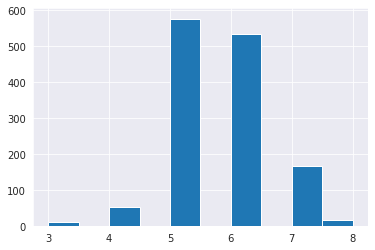

In [10]:
plt.hist(mydata['Signal_Strength'])
# mydata['Signal_Strength'].plot(kind='density')

**Pairplot to Visualise**

<Figure size 720x360 with 0 Axes>

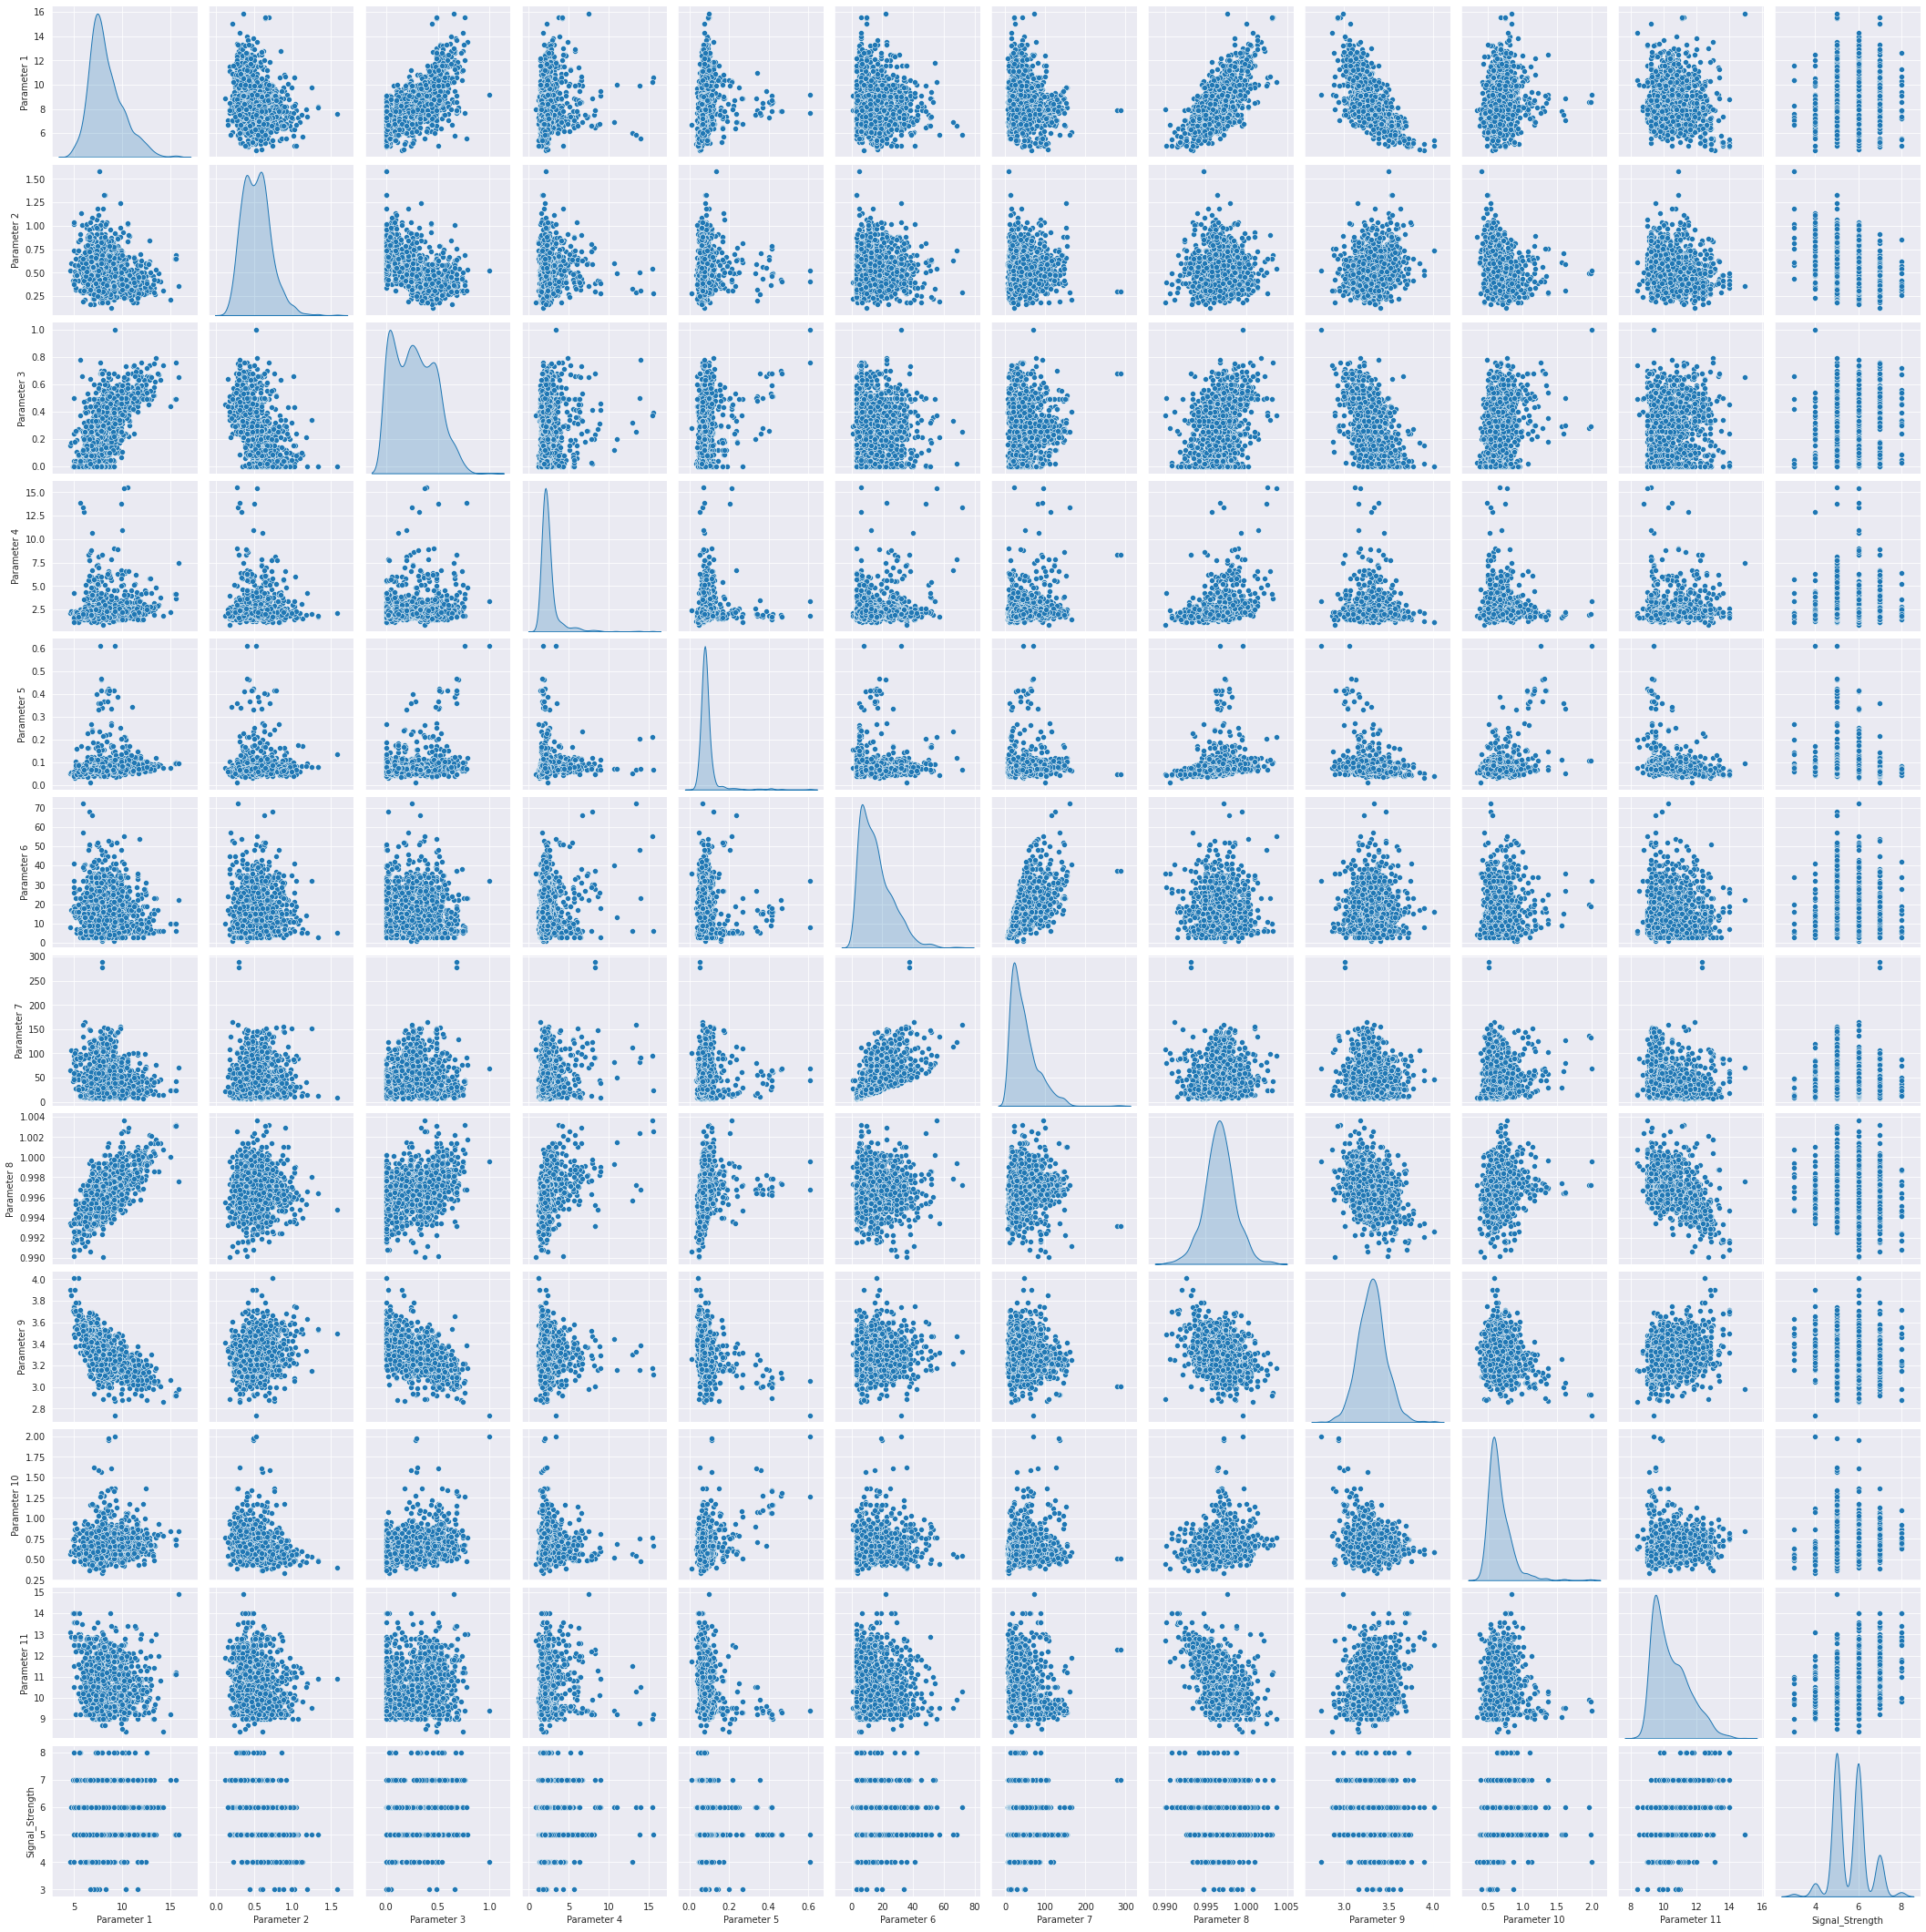

In [11]:
plt.figure(figsize=(10,5))
sns.pairplot(mydata,diag_kind='kde');
plt.show()

**E. Share insights from the initial data analysis**

### <font color=darkblue> Insights from scatterplot Q2.d:
 
    1. Data is normally distributed with some parameters having skewness.
    
    2. Some positive and negative correlations among the parameters.

    3. The target variable is distributed about 5-6 range values.

# **2.Data preprocessing**



**A. Split the data into X & Y.**

In [12]:
# Independent variables
X=mydata.drop('Signal_Strength',axis=1)  

# Target variable
Y=mydata['Signal_Strength']               


In [13]:
print(X.shape)
print(Y.shape)

(1359, 11)
(1359,)


**B. Split the data into train & test with 70:30 proportion.**

In [14]:
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X, Y, train_size=0.7, random_state=12)

**C. Print shape of all the 4 variables and verify if train and test data is in sync.**

In [15]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(951, 11)
(408, 11)
(951,)
(408,)


**D. Normalise the train and test data with appropriate method.**

In [16]:
# Scaling training data
X_Train_S = StandardScaler().fit_transform(X_Train)   

# Scaling testing data
X_Test_S = StandardScaler().fit_transform(X_Test)     

**E. Transform Labels into format acceptable by Neural Network**

In [17]:
# Converting y data into categorical (one-hot encoding)
from keras.utils.np_utils import to_categorical
Y_Train = to_categorical(Y_Train)
Y_Test = to_categorical(Y_Test)

In [18]:
print(Y_Train.shape)
print(Y_Test.shape)

(951, 9)
(408, 9)


# **3. Model Training & Evaluation using Neural Network**

**A. Design a Neural Network to train a classifier.**

In [19]:
NN_model_Classifier = Sequential()
# The Input Layer :
NN_model_Classifier.add(Dense(64, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier.add(Dense(32, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))

NN_model_Classifier.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_4 (Dense)             (None, 9)                 1

**B. Train the classi ier using previously designed Architecture**

In [20]:
EPOCH=400
Network_Classifier=NN_model_Classifier.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
5/5 [==============================] - 1s 53ms/step - loss: 0.1975 - accuracy: 0.3933 - val_loss: 0.1973 - val_accuracy: 0.4314
Epoch 2/400
5/5 [==============================] - 0s 14ms/step - loss: 0.1973 - accuracy: 0.4385 - val_loss: 0.1971 - val_accuracy: 0.4240
Epoch 3/400
5/5 [==============================] - 0s 10ms/step - loss: 0.1970 - accuracy: 0.4248 - val_loss: 0.1969 - val_accuracy: 0.4240
Epoch 4/400
5/5 [==============================] - 0s 9ms/step - loss: 0.1968 - accuracy: 0.4248 - val_loss: 0.1966 - val_accuracy: 0.4240
Epoch 5/400
5/5 [==============================] - 0s 14ms/step - loss: 0.1964 - accuracy: 0.4248 - val_loss: 0.1961 - val_accuracy: 0.4240
Epoch 6/400
5/5 [==============================] - 0s 10ms/step - loss: 0.1959 - accuracy: 0.4248 - val_loss: 0.1954 - val_accuracy: 0.4240
Epoch 7/400
5/5 [==============================] - 0s 14ms/step - loss: 0.1950 - accuracy: 0.4248 - val_loss: 0.1941 - val_accuracy: 0.4240
Epoch 8/400
5/5 [====

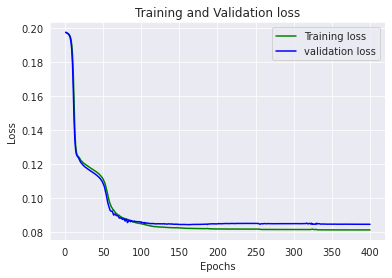

In [21]:
loss_train = Network_Classifier.history['loss']
loss_val = Network_Classifier.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

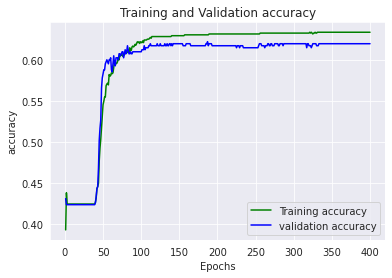

In [22]:
Acc_train = Network_Classifier.history['accuracy']
Acc_val = Network_Classifier.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [23]:
for key in Network_Classifier.history.keys():
    print(key)

loss
accuracy
val_loss
val_accuracy


**D. Design new architecture/update existing architecture in attempt to improve the performance of the model.**

In [24]:
NN_model_Classifier_1 = Sequential()
# The Input Layer :
NN_model_Classifier_1.add(Dense(128, kernel_initializer='normal',input_dim = X_Train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model_Classifier_1.add(Dense(64, kernel_initializer='normal',activation='relu'))  # sigmoid, tanh

NN_model_Classifier_1.add(Dense(32, kernel_initializer='normal'))
NN_model_Classifier_1.add(LeakyReLU(alpha=0.1))

NN_model_Classifier_1.add(Dense(16, kernel_initializer='normal'))
NN_model_Classifier_1.add(LeakyReLU(alpha=0.1))


# The Output Layer :
NN_model_Classifier_1.add(Dense(9, kernel_initializer='normal',activation='softmax'))  # except softmax

# Compile the network :
NN_model_Classifier_1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
NN_model_Classifier_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 9)                

In [25]:
EPOCH=400
Network_Classifier_1=NN_model_Classifier_1.fit(X_Train_S, Y_Train, validation_data=(X_Test_S,Y_Test), epochs=EPOCH, batch_size=200)

Epoch 1/400
5/5 [==============================] - 1s 46ms/step - loss: 0.1975 - accuracy: 0.3365 - val_loss: 0.1973 - val_accuracy: 0.3897
Epoch 2/400
5/5 [==============================] - 0s 10ms/step - loss: 0.1973 - accuracy: 0.3954 - val_loss: 0.1971 - val_accuracy: 0.3897
Epoch 3/400
5/5 [==============================] - 0s 10ms/step - loss: 0.1970 - accuracy: 0.3954 - val_loss: 0.1968 - val_accuracy: 0.3897
Epoch 4/400
5/5 [==============================] - 0s 10ms/step - loss: 0.1967 - accuracy: 0.3954 - val_loss: 0.1964 - val_accuracy: 0.3897
Epoch 5/400
5/5 [==============================] - 0s 17ms/step - loss: 0.1961 - accuracy: 0.3954 - val_loss: 0.1955 - val_accuracy: 0.3897
Epoch 6/400
5/5 [==============================] - 0s 10ms/step - loss: 0.1950 - accuracy: 0.3954 - val_loss: 0.1939 - val_accuracy: 0.3897
Epoch 7/400
5/5 [==============================] - 0s 10ms/step - loss: 0.1927 - accuracy: 0.3954 - val_loss: 0.1903 - val_accuracy: 0.3897
Epoch 8/400
5/5 [===

**E. Plot visuals as in Q3.C and share insights about difference observed in both the models.**

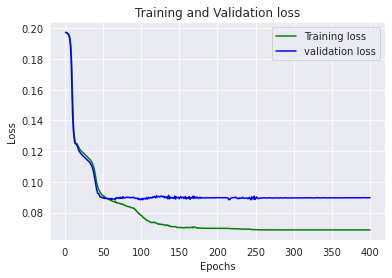

In [26]:
loss_train_1 = Network_Classifier_1.history['loss']
loss_val_1 = Network_Classifier_1.history['val_loss']
epochs = range(1,EPOCH+1)
plt.plot(epochs, loss_train_1, 'g', label='Training loss')
plt.plot(epochs, loss_val_1, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

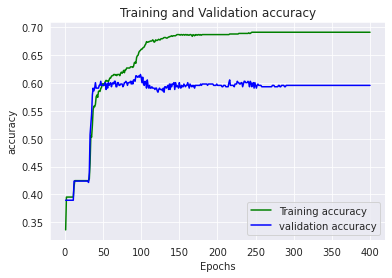

In [27]:
Acc_train_1 = Network_Classifier_1.history['accuracy']
Acc_val_1 = Network_Classifier_1.history['val_accuracy']
epochs = range(1,EPOCH+1)
plt.plot(epochs, Acc_train_1, 'g', label='Training accuracy')
plt.plot(epochs, Acc_val_1, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [28]:
from keras.models import model_from_json
import numpy
import os

# Pickle model to JSON
Classifier_model_json_1 = NN_model_Classifier_1.to_json()
with open("Classifier_model_1.json", "w") as json_file:
    json_file.write(Classifier_model_json_1)
# Pickle weights to HDF5
NN_model_Classifier_1.save_weights("Classifier_model_1.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier_model_1.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 59.56%


In [29]:
# Pickle model to JSON
Classifier_model_json = NN_model_Classifier.to_json()
with open("Classifier_model.json", "w") as json_file:
    json_file.write(Classifier_model_json)
# Pickle weights to HDF5
NN_model_Classifier.save_weights("Classifier_model.h5")
print("Saved model to disk")


# load json and create model
json_file = open('Classifier_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("Classifier_model.h5")
print("Loaded model from disk")

# Evaluate
loaded_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X_Test_S,Y_Test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 62.01%


# Part B

* <span style="color:#daad86">**DOMAIN**: <span style="color:#659dbd">Autonomous Vehicles
* <span style="color:#daad86">**CONTEXT**: <span style="color:#659dbd">A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This dif iculty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.

* <span style="color:#daad86">**DATA DESCRIPTION**: <span style="color:#659dbd">The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a signi icantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Where the labels for each of this image are the prominent number in that image i.e. 2,6,7 and 4 respectively.
The dataset has been provided in the form of h5py iles. You can read about this ile format here: https://docs.h5py.org/en/stable/
Acknowledgement: Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised
Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://u ldl.stanford.edu/housenumbers as the URL for this site.

    
* <span style="color:#daad86">**PROJECT OBJECTIVE**: <span style="color:#659dbd">To build a digit classi ier on the SVHN (Street View Housing Number) dataset.

# **1. Data Import and Exploration**

**A. Read the .h5 ile and assign to a variable.**

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**B. Print all the keys from the .h5 file.**

In [31]:
#Read the data as a data frame
import h5py

data_set = h5py.File('/content/drive/My Drive/AIML/Autonomous_Vehicles_SVHN_single_grey1.h5')
data_set.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

**C. Split the data into X_train, X_test, Y_train, Y_test**

In [32]:
# Load the training, test and validation set
X_train = data_set['X_train'][:]
y_train = data_set['y_train'][:]
X_test = data_set['X_test'][:]
y_test = data_set['y_test'][:]


In [33]:
X_train[:1]   

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

# **2. Data Visualisation and preprocessing**

**A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.**

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(42000, 32, 32)
(42000,)
(18000, 32, 32)
(18000,)


**B. Visualise first 10 images in train data and print its corresponding labels.**

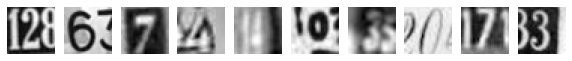

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

**C. Reshape all the images with appropriate shape update the data in same variable.**

In [36]:
# Flatten the images
image_vector_size = 32*32
X_train = X_train.reshape(X_train.shape[0], image_vector_size)
X_test = X_test.reshape(X_test.shape[0], image_vector_size)

**D. Normalise the images i.e. Normalise the pixel values.**

In [37]:
# # normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

print(' Resized Training set', X_train.shape, y_train.shape)
print('Resized Test set', X_test.shape, y_test.shape)

 Resized Training set (42000, 1024) (42000,)
Resized Test set (18000, 1024) (18000,)


**E. Transform Labels into format acceptable by Neural Network**

In [38]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


**F. Print total Number of classes in the Dataset.**

In [39]:
# no.of classes
num_classes = y_test.shape[1] 
print("The number of classes in this dataset are:",num_classes)


The number of classes in this dataset are: 10


# **3. Model Training & Evaluation using Neural Network.**

**A. Design a Neural Network to train a classifier.**

In [71]:
def NN_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu', kernel_initializer='he_uniform' )) ###Multiple Dense units with Relu activation
    model.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='he_uniform' , activation='relu'))
    model.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='he_uniform', activation='softmax'))
    return model

In [72]:
# Creating an object of our model
# build the model
model = NN_model()

**B. Train the classifier using previously designed Architecture (Use best suitable parameters).**

In [73]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)

### Loss function = Categorical cross entropy
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) 

**C. Evaluate performance of the model with appropriate metrics.**

In [74]:
# Fitting the model
training_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Epoch 1/100
140/140 - 3s - loss: 2.3033 - accuracy: 0.1078 - val_loss: 2.2725 - val_accuracy: 0.1394 - 3s/epoch - 19ms/step
Epoch 2/100
140/140 - 2s - loss: 2.1205 - accuracy: 0.2290 - val_loss: 1.8578 - val_accuracy: 0.3666 - 2s/epoch - 13ms/step
Epoch 3/100
140/140 - 2s - loss: 1.6545 - accuracy: 0.4441 - val_loss: 1.4418 - val_accuracy: 0.5373 - 2s/epoch - 14ms/step
Epoch 4/100
140/140 - 2s - loss: 1.4066 - accuracy: 0.5385 - val_loss: 1.3407 - val_accuracy: 0.5670 - 2s/epoch - 13ms/step
Epoch 5/100
140/140 - 2s - loss: 1.3161 - accuracy: 0.5736 - val_loss: 1.2498 - val_accuracy: 0.6021 - 2s/epoch - 13ms/step
Epoch 6/100
140/140 - 2s - loss: 1.2444 - accuracy: 0.6028 - val_loss: 1.2041 - val_accuracy: 0.6222 - 2s/epoch - 14ms/step
Epoch 7/100
140/140 - 2s - loss: 1.1734 - accuracy: 0.6340 - val_loss: 1.1684 - val_accuracy: 0.6328 - 2s/epoch - 13ms/step
Epoch 8/100
140/140 - 2s - loss: 1.1264 - accuracy: 0.6490 - val_loss: 1.0922 - val_accuracy: 0.6628 - 2s/epoch - 13ms/step
Epoch 9/

In [75]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (300, 1024)               0         
                                                                 
 dense_55 (Dense)            (300, 256)                262400    
                                                                 
 dense_56 (Dense)            (300, 64)                 16448     
                                                                 
 dense_57 (Dense)            (300, 64)                 4160      
                                                                 
 dense_58 (Dense)            (300, 32)                 2080      
                                                                 
 dense_59 (Dense)            (300, 10)                 330       
                                                                 
Total params: 285,418
Trainable params: 285,418
Non-t

**D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same.**

In [76]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 0.6925309896469116
Accuracy: 0.8062222003936768


Text(0.5, 1.0, 'Training and validation loss')

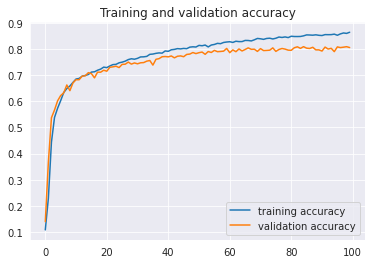

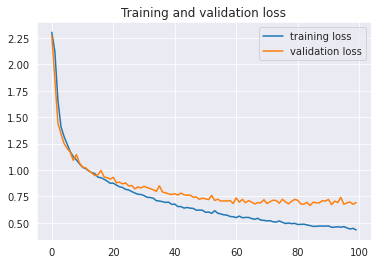

In [77]:
accuracy      = training_history.history['accuracy']
val_accuracy  = training_history.history['val_accuracy']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  (epochs, accuracy, label = 'training accuracy' )
plt.plot  (epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  (epochs, loss, label = 'training loss' )
plt.plot  (epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

### <font color=darkblue> Observations from plots:
 
    1. After a while the model begins to overfit on our dataset as is clear 
      from the plots above where the validation loss begins to increase after   
      certain point and validation accuracy begins to decrease.
    
    2. Trained a Neural Network with dense hidden layers of different number 
       of units, we achieved a final test accuracy of 80.62%.